## Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import time 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score ,classification_report
from tensorflow.keras import datasets, layers,models
from keras.layers import Input  # Import Input function


## Splitting the dataset into the Training set and Test set

In [4]:
(X_train, y_train), (X_test, y_test) =datasets.cifar10.load_data()

## Normalize pixel values to range [0, 1]


In [6]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

## Define a shallow network


In [8]:
# Define the model
model = models.Sequential([
    Input(shape=(32, 32, 3)),               # Input layer specifying input shape
    layers.Flatten(),                      # Flatten the input image
    layers.Dense(512, activation='relu'),  # Single hidden layer with 512 neurons
    layers.Dense(10, activation='softmax') # Output layer for 10 classes
])

## Compile the model with NAG optimizer


In [10]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True)
model.compile(optimizer=optimizer, 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])


##  Train the model


In [12]:
start_time = time.time()
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2)
end_time = time.time()
training_time = end_time - start_time
print(f"\nTotal Training Time: {training_time:.2f} seconds")

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.2831 - loss: 2.0348 - val_accuracy: 0.3676 - val_loss: 1.8187
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.3849 - loss: 1.7821 - val_accuracy: 0.3969 - val_loss: 1.7504
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4158 - loss: 1.7011 - val_accuracy: 0.4111 - val_loss: 1.7047
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4276 - loss: 1.6518 - val_accuracy: 0.4192 - val_loss: 1.6737
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4429 - loss: 1.6120 - val_accuracy: 0.4247 - val_loss: 1.6453
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4566 - loss: 1.5756 - val_accuracy: 0.4394 - val_loss: 1.6185
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4633 - loss: 1.5559 - val_accuracy: 0.4538 - val_loss: 1.5839
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4791 - loss: 1.5188 - val_accuracy: 0.

## Making the classification Report

In [14]:
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)  # Convert probabilities to class labels

print("classification Report:  \n",classification_report(y_test,y_pred_classes))
print("Nesterov Accuracy:  \n",accuracy_score(y_test,y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
classification Report:  
               precision    recall  f1-score   support

           0       0.65      0.41      0.50      1000
           1       0.61      0.59      0.60      1000
           2       0.32      0.53      0.40      1000
           3       0.35      0.40      0.37      1000
           4       0.52      0.27      0.36      1000
           5       0.53      0.20      0.29      1000
           6       0.46      0.66      0.54      1000
           7       0.59      0.52      0.55      1000
           8       0.54      0.72      0.62      1000
           9       0.54      0.59      0.56      1000

    accuracy                           0.49     10000
   macro avg       0.51      0.49      0.48     10000
weighted avg       0.51      0.49      0.48     10000

Nesterov Accuracy:  
 0.4883


## Visualize Training History (Accuracy and Loss)


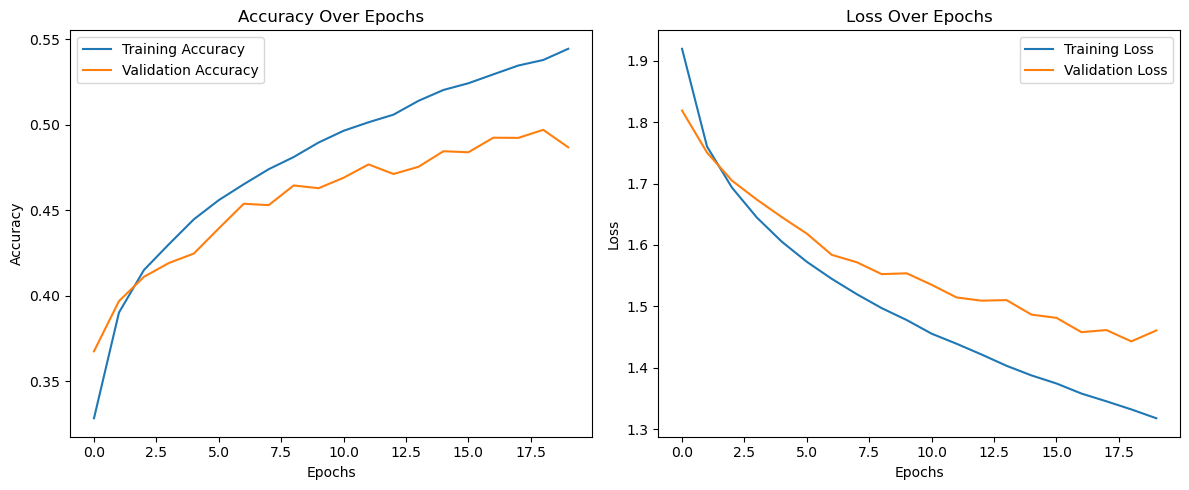

In [16]:
# Plot training & validation accuracy
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


## Confusion Matrix Visualization

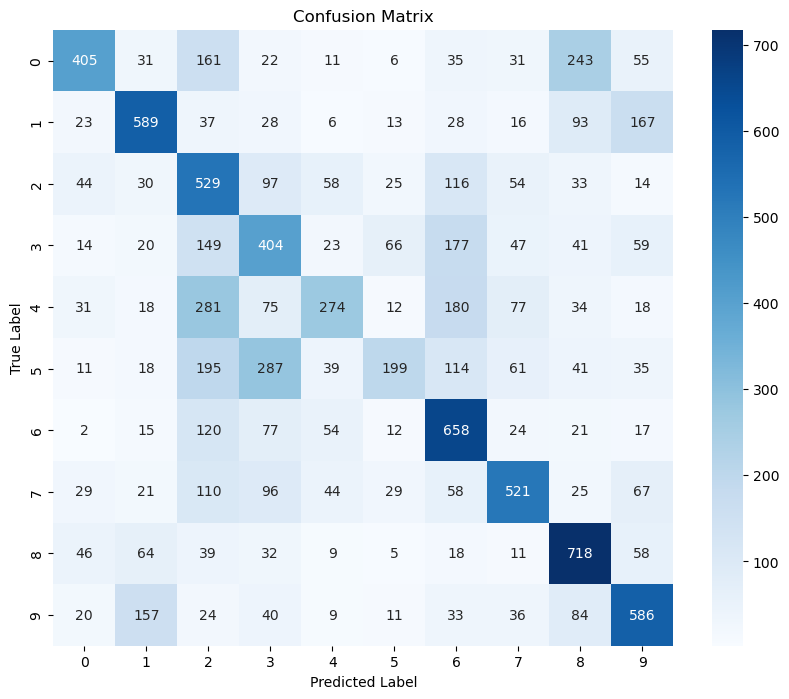

In [18]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

